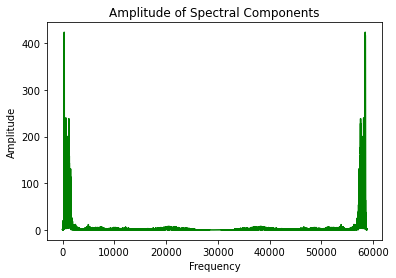

In [104]:
## A1) Use numpy.fft.fft() to transform the speech signal to its spectral domain. 
## Please plot the amplitude part of the spectral components and observe it. 
## Use numpy.fft.ifft() to inverse transform the frequency spectrum to time domain signal.

import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
from scipy import signal

audioFile = r"C:\Users\KAILASH\Downloads\mayank_speech.wav"
speechSignal, sampleRate = librosa.load(audioFile)
speechSpectrum = np.fft.fft(speechSignal)

plt.plot(np.abs(speechSpectrum), color='green')  # Set color to 'green'
plt.title('Amplitude of Spectral Components')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

timeDomainSignal = np.fft.ifft(speechSpectrum)

In [109]:
## A2) Use a rectangular window to select the low frequency components from your spectrum.
## Inverse transform the filtered spectrum and listen to this sound.
## Repeat the same for band pass and high pass frequencies of spectrum.
def plotWaveform(y, sr,title):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr, color='green')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()


def applyFilterAndListen(y, sr, filter_type):
    D = np.fft.fft(y)

    if filterType == 'rectangular':
        cutoff = 2000  
        order = 101    
        b = signal.firwin(order, cutoff, fs=sr, pass_zero=False, scale=False)

    elif filterType == 'bandpass':
        lowcut = 1000   
        highcut = 4000  
        order = 101     
        b = signal.firwin(order, [lowcut, highcut], fs=sr, pass_zero=False, scale=False)

    elif filterType == 'highpass':
        cutoff = 3000  
        order = 100  
        b = signal.firwin(order + 1, cutoff, fs=sr, pass_zero=False, scale=False) 
 
  
    bPadded = np.pad(b, (0, len(D) - len(b)), mode='constant')
    dFiltered = D * bPadded
    yFiltered = np.fft.ifft(dFiltered).real
    yFiltered /= np.max(np.abs(yFiltered))
    plotWaveform(yFiltered,sr,filterType)
    sf.write(f"filtered{filterType}.wav", yFiltered, sr)
    

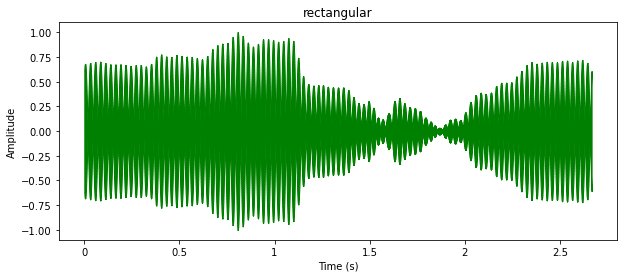

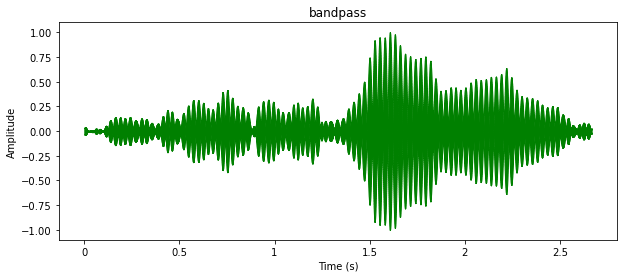

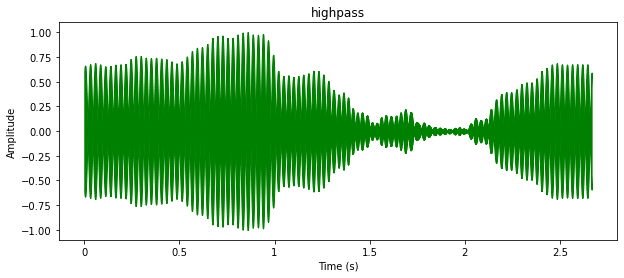

In [110]:
filterTypes = ['rectangular', 'bandpass', 'highpass']
for filterType in filterTypes:
    applyFilterAndListen(y, sr, filterType) 

In [119]:
## A3) Repeat A2 with other filter types such as Cosine / Gausian filters.
def plotWaveform(y, sr,title):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr, color='green')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()
    
def applyOtherFiltersAndListen(y, sr):
    
    bCosine = signal.firwin(100, cutoff=2000, fs=sr, pass_zero=True, window='cosine')
    bCosinePadded = np.pad(bCosine, (0, len(y) - len(bCosine)), mode='constant')
    dCosineFiltered = np.fft.fft(y) * bCosinePadded
    yCosineFiltered = np.fft.ifft(dCosineFiltered).real
    yCosineFiltered /= np.max(np.abs(yCosineFiltered))
    plotWaveform(yCosineFiltered,sr,'yCosineFiltered')
    sf.write("filteredCosine.wav",yCosineFiltered, sr)
    
    bGaussian = signal.firwin(100, cutoff=2000, fs=sr, pass_zero=True)
    window = signal.gaussian(100, std=5)
    bGaussian *= window
    bGaussianPadded = np.pad(bGaussian, (0, len(y) - len(bGaussian)), mode='constant')
    dGaussianFiltered = np.fft.fft(y) * bGaussianPadded
    yGaussianFiltered = np.fft.ifft(dGaussianFiltered).real
    yGaussianFiltered /= np.max(np.abs(yGaussianFiltered))
    plotWaveform(yGaussianFiltered,sr,"yGaussianFiltered")
    sf.write("filteredGaussian.wav",yGaussianFiltered, sr)
    


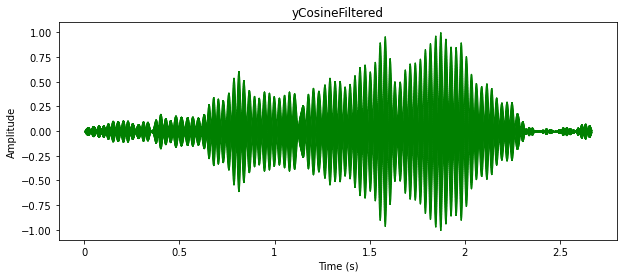

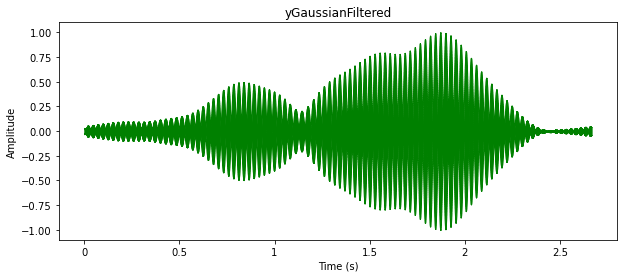

In [120]:
applyOtherFiltersAndListen(y, sr)